In [1]:
%matplotlib inline

# Data 620¶
# Week 6 Assignment
# Amanda Arce & Nicholas Schettini

Here is a dataset that shows a simple 2-node network: the attendance of 18 Southern Women at 14 social events:

Brief Description. Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms. Dataset. Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html What can you infer about the relationships between (1) the women, and (2) the social events?

Please provide your code and analysis in an Jupyter notebook stored in your GitHub repository.




























In [12]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite

G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']

In [24]:
print(women)

['Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price']


In [25]:
print(clubs)

['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14']


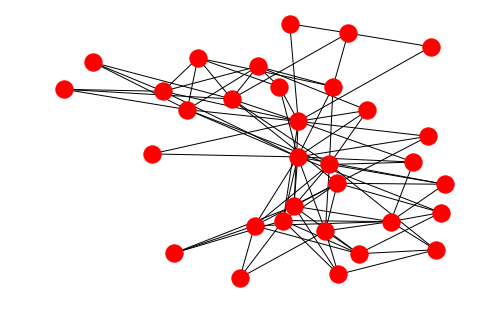

In [16]:
nx.draw(G)
plt.show()

In [15]:
print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


In [17]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print('')
print("#Friends, Member")
for w in women:
    print('%d %s' % (W.degree(w), w))


#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


In [19]:
# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print('')
print("#Friend meetings, Member")
for w in women:
    print('%d %s' % (W.degree(w, weight='weight'), w))


#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


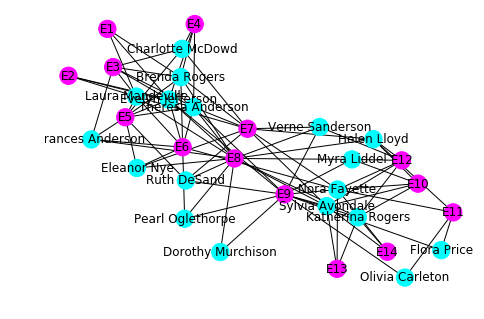

In [28]:
val_map = {'E1': 1.0, 'E2': 1.0,'E3': 1.0, 'E4': 1.0,  'E5': 1.0,  'E6': 1.0,  'E7': 1.0,  'E8': 1.0,  'E9': 1.0,
            'E10': 1.0,  'E11': 1.0, 'E12': 1.0, 'E13': 1.0,  'E14': 1.0}
values = [val_map.get(node, 0.5) for node in G.nodes()]
nx.draw(G, cmap=plt.get_cmap('cool'), node_color=values, with_labels=True, font_color='black')
plt.show()

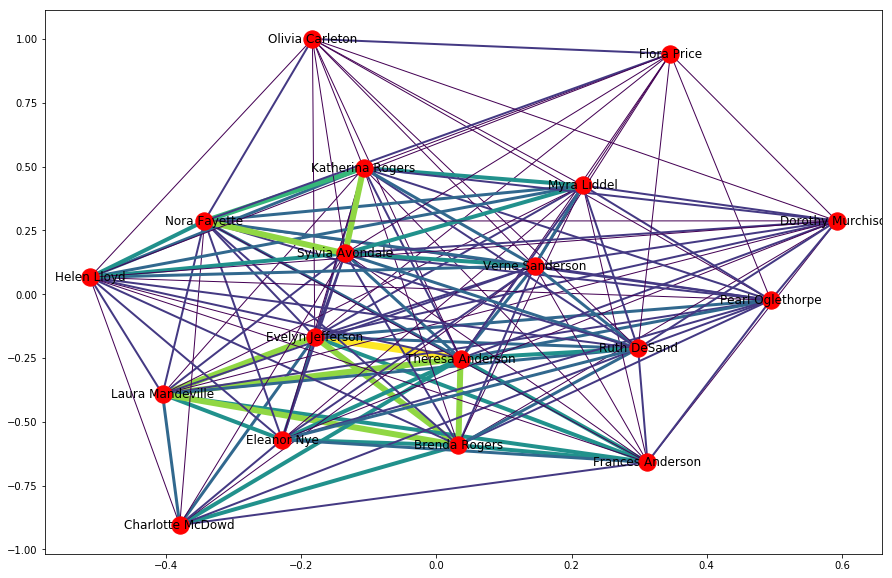

In [31]:
weights = [edata['weight'] for f,t,edata in W.edges(data=True)]
plt.figure(figsize = (15,10))
nx.draw_networkx(W, width=weights, edge_color=weights)

## What can you infer about the relationships between (1) the women, and (2) the social events?

It seems that a few groups of women tend to attend the same events together, while there are also women who seem to repeatably attend multiple events.  
